In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle
import numpy as np
from scipy.misc import imread, imsave
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

from src.enhancer import ImageComparator
from src.enhancer.enhancers import ENHANCERS

In [4]:
base_path = Path('test-2')
originals_path = base_path / 'original'
masks_path = base_path / 'mask'
weight_maps_path = base_path / 'weight-map'

filenames = [file.stem for file in originals_path.iterdir()]
filenames

['flickr-orchid',
 'flickr-ferrari',
 'flickr-cheese',
 'flickr-tulip',
 'flickr-bee',
 'flickr-hamster',
 'flickr-lily',
 'strawberry-3',
 'flickr-banana',
 'strawberry-2',
 'flickr-candle',
 'flickr-butterflies',
 'strawberry-1',
 'flickr-sunflower',
 'flickr-strawberry']

(-0.5, 499.5, 332.5, -0.5)

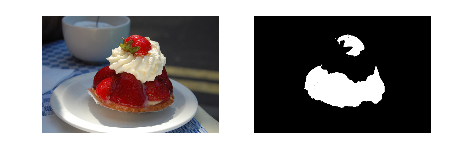

In [4]:
filename = 'z-values/strawberry-local.pkl'
zcollection = pickle.load(open(filename, 'rb'))

for key in zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
                                              'frequency_hist').descriptors:
    dir_path = base_path / key
    dir_path.mkdir(exist_ok=True, parents=True)

keyword = 'strawberry-1'
image = imread(originals_path / ('%s.jpg' % keyword))
seg_b = imread(masks_path / ('%s-mask.png' % keyword)).astype(np.bool)

plt.rcParams['figure.figsize'] = 5, 5
plt.subplot(121)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.imshow(seg_b, cmap='gray')
plt.axis('off')

In [85]:
from src.descriptors.descriptors import DESCRIPTORS
image_comparator = ImageComparator()

for key in zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
                                              'frequency_hist').descriptors:
    delta, _ = image_comparator.compare_descriptor(image, key, zcollection.descriptors[key])
    z_delta = zcollection.descriptors[key].descriptor * delta
    
    # Global enhancement
    result_g = ENHANCERS[key].enhance(image, z_delta, 2)
    imsave(base_path / key / ('%s-g-g.jpg' % keyword), result_g)

    # Local enhancement
    result_l = ENHANCERS[key].enhance(image, z_delta, 2, mask=seg_b)
    imsave(base_path / key / ('%s-g-l.jpg' % keyword), result_l)
    
print(image_comparator.compare(image, zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
                                              'frequency_hist'))[0])
# print(image_comparator.compare(image, zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
#                                               'frequency_hist'), seg_b)[0])

rgb_hist 0.0250183001278
lch_hist 0.0560371944279
lab_hist 0.0360238251394
hue_angle_hist 0.244986817384
chroma_hist 0.229297973803
hue_angle_hist


# Working here now!

rgb_hist 0.0250183001278
lch_hist 0.0560371944279
lab_hist 0.0360238251394
hue_angle_hist 0.244986817384
chroma_hist 0.229297973803
hue_angle_hist


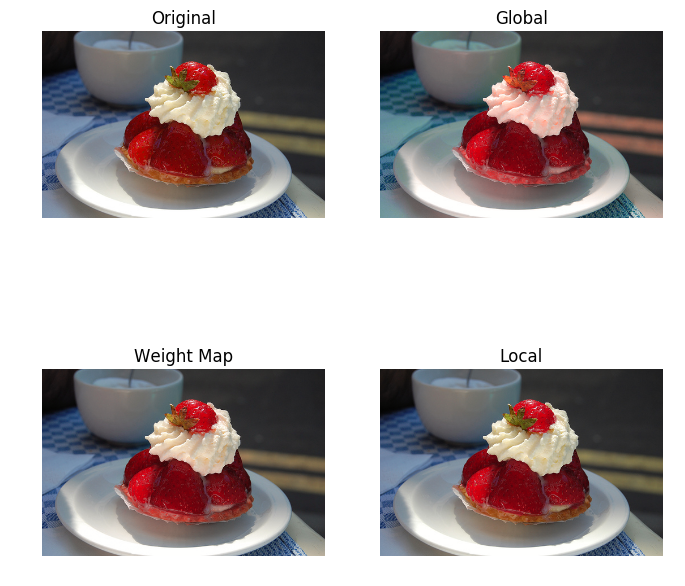

In [88]:
image_comparator = ImageComparator()
key, z_delta = image_comparator.compare(image, zcollection)
print(key)

# Global enhancement
result_g = ENHANCERS[key].enhance(image, z_delta, 1)
#imsave(g_g_path / ('%s.jpg' % keyword), result_g)

# Mask based enhancement
weight_map = ENHANCERS[key].compute_weight_map(image, zcollection.descriptors[key].descriptor)
result_w = weight_map * result_g + (1 - weight_map) * image
result_w = result_w.astype(np.uint8)
# imsave(weight_maps_path / ('%s.jpg' % keyword), weight_map)
# imsave(g_w_path / ('%s.jpg' % keyword), result_w)
       
# Local enhancement
result_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
# imsave(g_l_path / ('%s.jpg' % keyword), result_l)

plt.rcParams['figure.figsize'] = 8, 8
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(result_g)
plt.axis('off')
plt.title('Global')

plt.subplot(2, 2, 3)
plt.imshow(result_w)
plt.axis('off')
plt.title('Weight Map')

plt.subplot(2, 2, 4)
plt.imshow(result_l)
plt.axis('off')
plt.title('Local')

In [38]:
image_comparator = ImageComparator()
key, z_delta = image_comparator.compare(image, zcollection, mask=seg_b)
print(key)

# Global enhancement
result_g = ENHANCERS[key].enhance(image, z_delta, 2)
imsave(l_g_path / ('%s.jpg' % keyword), result_g)

# Mask based enhancement
weight_map = ENHANCERS[key].compute_weight_map(image, zcollection.descriptors[key].descriptor)
result_w = weight_map * result_g + (1 - weight_map) * image
result_w = result_w.astype(np.uint8)
imsave(l_w_path / ('%s.jpg' % keyword), result_w)
       
# Local enhancement
result_l = ENHANCERS[key].enhance(image, z_delta, 2, mask=seg_b)
imsave(l_l_path / ('%s.jpg' % keyword), result_l)

plt.rcParams['figure.figsize'] = 8, 8
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(result_g)
plt.axis('off')
plt.title('Global')

plt.subplot(2, 2, 3)
plt.imshow(result_w)
plt.axis('off')
plt.title('Weight Map')

plt.subplot(2, 2, 4)
plt.imshow(result_l)
plt.axis('off')
plt.title('Local')

[[[  2.43657500e-01   1.32446453e-01   2.20799863e-01   1.70418601e-02
     5.06724371e-03   1.84757507e-03   3.22487031e-04   5.73888072e-04]
  [  8.52878466e-02   4.51165102e-02   3.82653065e-02   1.10823112e-02
     8.32028873e-03   5.49985189e-03   1.07176602e-03   2.58249650e-03]
  [  8.42767283e-02   2.19780225e-02   8.21998436e-03   5.10204071e-03
     2.34096264e-03   1.00125512e-02   8.63589905e-03   1.14777614e-03]
  [  3.43218297e-02   2.67929919e-02   1.32426629e-02   4.47156373e-03
     2.62681162e-03   2.62813689e-03   5.01439301e-03   1.83328392e-03]
  [  9.44846403e-03   2.12862324e-02   7.22775934e-03   3.62892933e-02
     1.33912601e-02   2.71921023e-03   9.53463663e-04   1.26919663e-03]
  [  8.52622185e-03   3.12443892e-03   8.00120737e-03   5.98226255e-03
     4.34866222e-03   1.12951803e-03   8.06776923e-04   1.05766382e-03]
  [  1.49006620e-02   1.43652360e-04   8.61914188e-04   4.09973226e-03
     1.29623595e-03   1.19588210e-03   1.95582281e-04   2.68925651e-04]

NameError: name 'l_g_path' is not defined

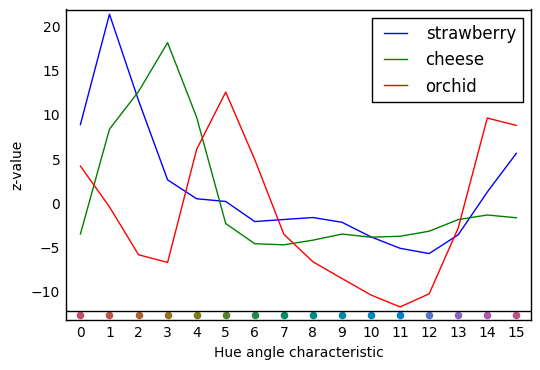

In [8]:
strawberry_z = 'z-values/strawberry.pkl'
banana_z = 'z-values/cheese.pkl'
orchid_z = 'z-values/orchid.pkl'
z_s = pickle.load(open(strawberry_z, 'rb'))
z_b = pickle.load(open(banana_z, 'rb'))
z_o = pickle.load(open(orchid_z, 'rb'))

from src.shared import rgb_hue

plt.plot(z_s.descriptors['hue_angle_hist'].descriptor, label='strawberry')
plt.plot(z_b.descriptors['hue_angle_hist'].descriptor, label='cheese')
plt.plot(z_o.descriptors['hue_angle_hist'].descriptor, label='orchid')
plt.axhline(-12, color='black')
plt.xlim([-0.5, 15.5])
plt.ylim([-13, 22])
plt.ylabel('z-value')
plt.xlabel('Hue angle characteristic')
plt.xticks(np.arange(16))
plt.tick_params(axis=u'both', which=u'both',length=0)

for i in range(16):
    plt.scatter(i, -12.5, color=rgb_hue[i, :])
plt.legend()
plt.savefig('hue_angle_local.jpg')

19.4091194773
-16.6563116187


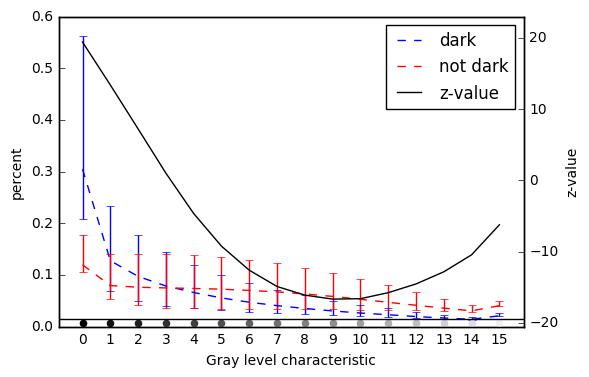

In [10]:
dark_z = 'z-values/dark.pkl'
z_d = pickle.load(open(dark_z, 'rb'))

gd = z_d.descriptors['gray_hist']
plt.xlim([-0.5, 15.5])
plt.xlabel('Gray level characteristic')
plt.xticks(np.arange(16))
plt.tick_params(axis='x', which='both', length=0)

ax = plt.gca()
ax.errorbar(np.arange(16), gd.mean, yerr=[gd.quantiles[1], gd.quantiles[2]], label='dark', ls='--')
ax.errorbar(np.arange(16), gd.nmean, yerr=[gd.nquantiles[1], gd.nquantiles[2]], label='not dark', ls='--', color='red')
ax.set_ylabel('percent')

ax_z = ax.twinx()
lns2 = ax_z.plot(gd.descriptor, label='z-value', color='black')
ax_z.axhline(-19.5, color='black')
ax_z.set_ylim([-20.5, 23])
ax_z.set_ylabel('z-value')

for i in range(16):
    ax_z.scatter(i, -20.0, color=np.array([1, 1, 1]) * i / 16.0)

h1, l1 = ax.get_legend_handles_labels()
h1 = [h[0] for h in h1]
h2, l2 = ax_z.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)

plt.savefig('dark-z-value.jpg')

print(gd.descriptor.max())
print(gd.descriptor.min())

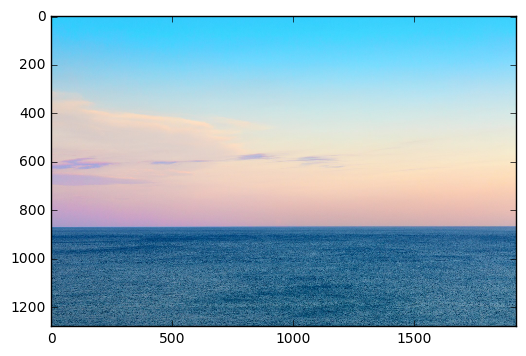

In [3]:
filename = 'z-values/sky.pkl'
zcollection = pickle.load(open(filename, 'rb'))

image = imread('test.jpg')


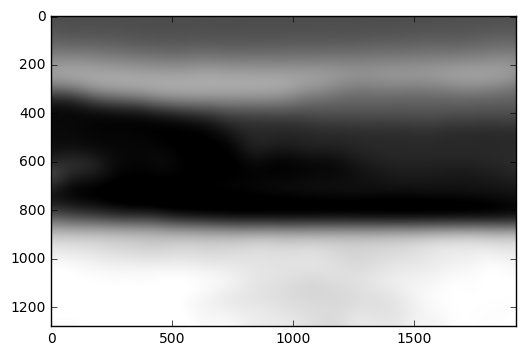

In [9]:
from skimage.filters import gaussian


z_descriptor = zcollection.descriptors['rgb_hist'].descriptor

h, w, d = image.shape
rgb = image.reshape(h * w, d)
bins = np.linspace(0, 256, 8 + 1, dtype=np.float32)

indices = np.minimum(np.digitize(rgb, bins) - 1, 8 - 1)
my_map = z_descriptor[np.hsplit(indices, 3)].reshape(h, w)

my_map = my_map.reshape(h, w)

# Blurring the weight map
sigma = 0.02 * np.hypot(h, w)
my_map = gaussian(my_map, sigma)

# Clipping the weight map
q = np.percentile(my_map, [5, 95])
my_map = np.minimum(q[1], np.maximum(q[0], my_map))

# Normalizing the weight map
my_map -= q[0]
my_map /= q[1] - q[0]
my_map = np.dstack(3 * (my_map,))

plt.imshow(my_map)

imsave('weight_map.jpg', my_map)

In [84]:
filename = 'z-values/orchid.pkl'
zcollection = pickle.load(open(filename, 'rb'))

items = ['gray_hist', 'chroma_hist', 'hue_angle_hist', 'rgb_hist', 'lab_hist', 'lch_hist']
string = ''
for i in items:
    string = string + (' & %s' % int(zcollection.descriptors[i].delta_z))
string


' & 8 & 25 & 24 & 32 & 34 & 36'

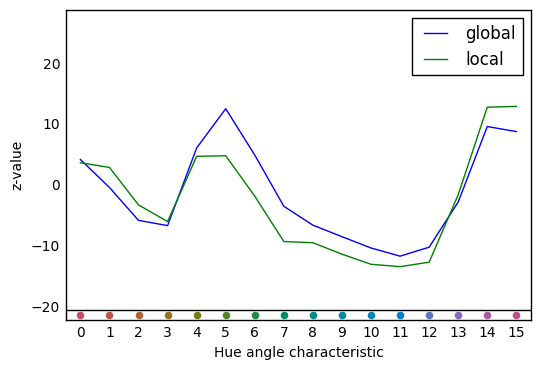

In [110]:
orchid_z = 'z-values/orchid.pkl'
orchid_zl = 'z-values/orchid-local.pkl'
z_o = pickle.load(open(orchid_z, 'rb'))
zl_o = pickle.load(open(orchid_zl, 'rb'))

from src.shared import rgb_hue

plt.plot(z_o.descriptors['hue_angle_hist'].descriptor, label='global')
plt.plot(zl_o.descriptors['hue_angle_hist'].descriptor, label='local')
plt.axhline(-20.5, color='black')
plt.xlim([-0.5, 15.5])
plt.ylim([-22, 29])
plt.ylabel('z-value')
plt.xlabel('Hue angle characteristic')
plt.xticks(np.arange(16))
plt.tick_params(axis=u'both', which=u'both',length=0)

for i in range(16):
    plt.scatter(i, -21.3, color=rgb_hue[i, :])
plt.legend()
plt.savefig('orchid-g-v-l.jpg')